<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_NYC_dataset = pd.read_csv('C:\\Users\\sheikmohamed.syedtha\\Documents\\DataSets\\311_Service_Requests_for_2009.csv')

C:\Users\sheikmohamed.syedtha\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,13,14,17,18,20,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_NYC_dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,01/01/2009 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"


In [5]:
#Shape before dropping nan values
df_NYC_dataset.shape

(1783133, 52)

In [6]:
df_NYC_dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

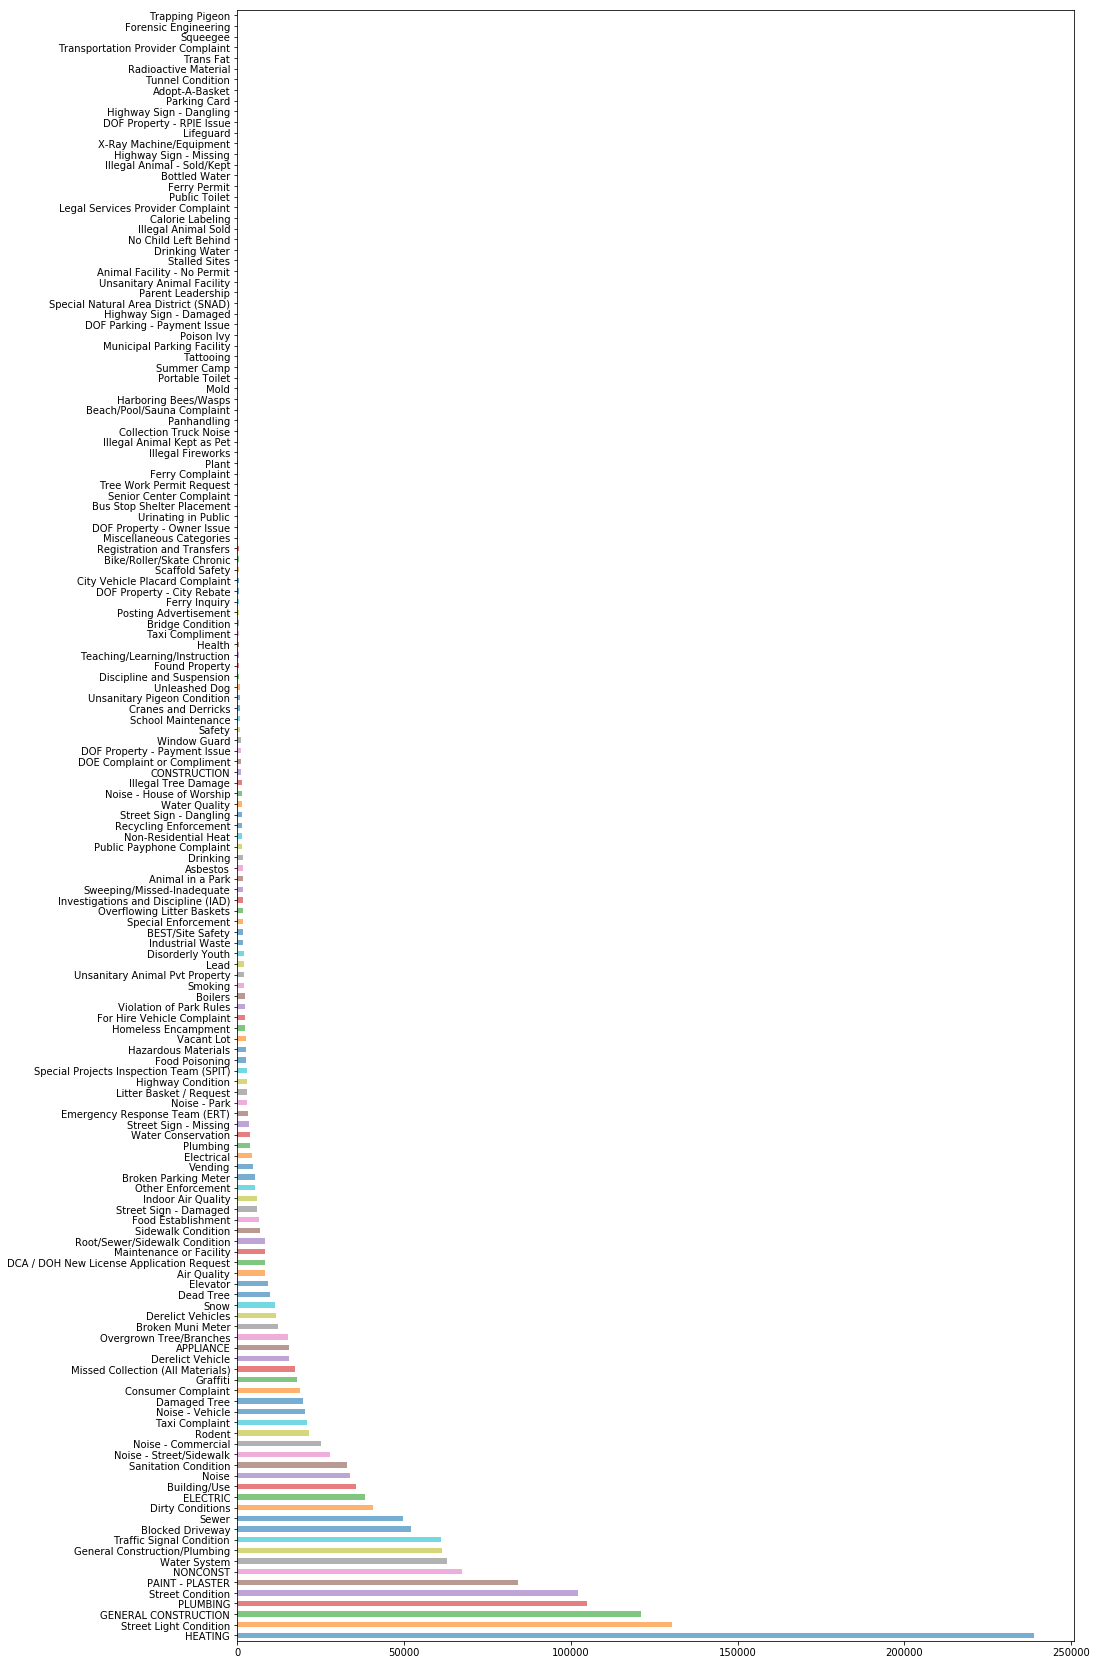

In [7]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
df_NYC_dataset['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,30))
plt.show()

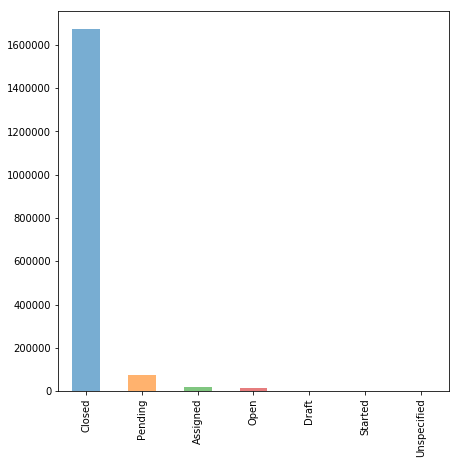

In [8]:
#Have a look at the status of tickets
df_NYC_dataset['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

In [9]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = df_NYC_dataset.groupby('Complaint Type')

In [26]:
grp_data = groupedby_complainttype.get_group('HEATING')

In [27]:
grp_data.shape

(238995, 52)

In [28]:
#To get nan values in the entire dataset
df_NYC_dataset.isnull().sum()

Unique Key                              0
Created Date                            0
Closed Date                         59331
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                           5540
Location Type                      574411
Incident Zip                       123025
Incident Address                   382336
Street Name                        382553
Cross Street 1                     385546
Cross Street 2                     394045
Intersection Street 1             1430866
Intersection Street 2             1430842
Address Type                        52218
City                               121815
Landmark                          1781072
Facility Type                     1555074
Status                                  0
Due Date                          1264395
Resolution Action Updated Date      14187
Community Board                         0
Borough                           

In [13]:
#fix blank values in City column
df_NYC_dataset['City'].dropna(inplace=True)

In [14]:
#Shape after dropping nan values
df_NYC_dataset['City'].shape

(1661318,)

In [29]:
#count of null values in grouped city column data
grp_data['City'].isnull().sum()

382

In [30]:
#fix those NAN with "unknown city" value instead
grp_data['City'].fillna('Unknown City', inplace =True)

C:\Users\sheikmohamed.syedtha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


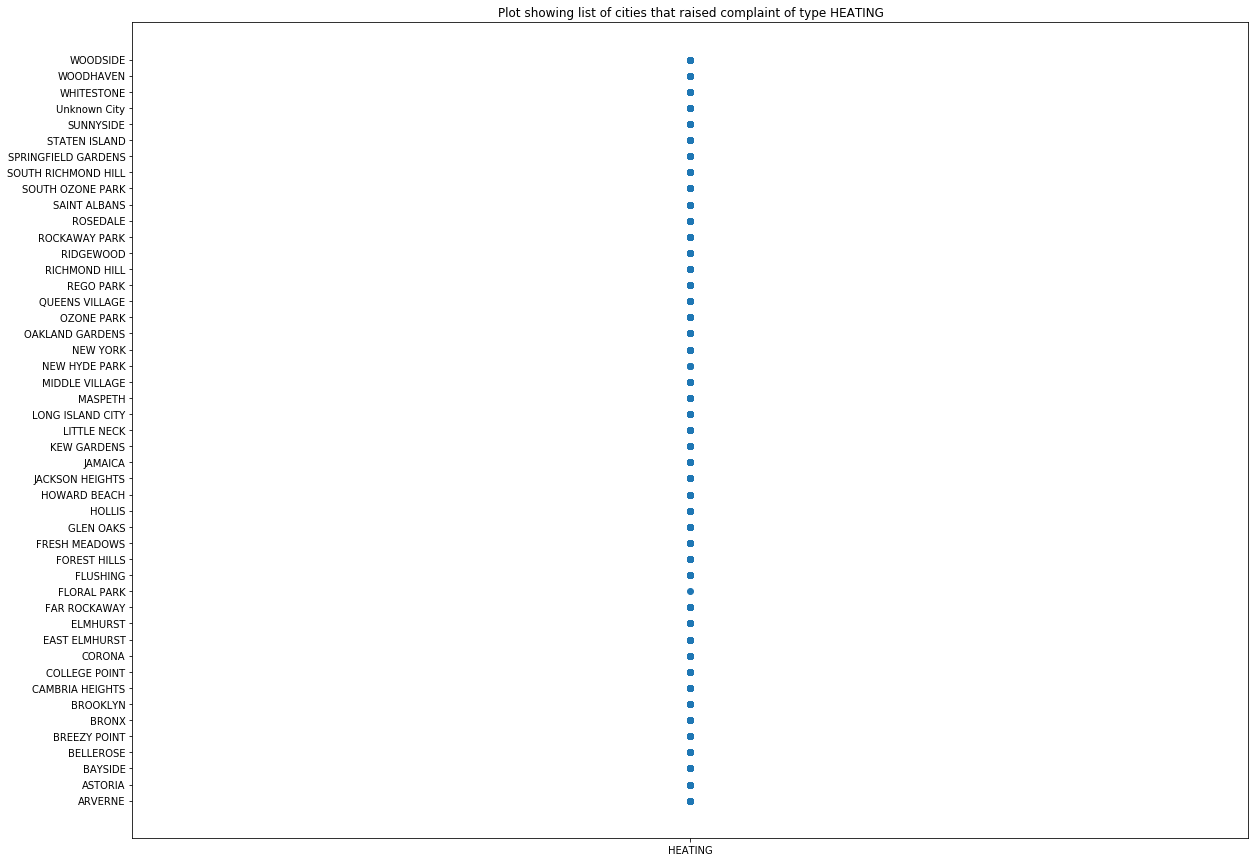

In [31]:
#Scatter plot displaying all the cities that raised complaint of type 'HEATING'
plt.figure(figsize=(20, 15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type HEATING')
plt.show()

In [18]:
#Find top 10 major complaint types and their counts
groupedby_complainttype['Complaint Type'].value_counts().nlargest(10)

Complaint Type                 Complaint Type               
HEATING                        HEATING                          238995
Street Light Condition         Street Light Condition           130242
GENERAL CONSTRUCTION           GENERAL CONSTRUCTION             121048
PLUMBING                       PLUMBING                         104931
Street Condition               Street Condition                 102150
PAINT - PLASTER                PAINT - PLASTER                   84324
NONCONST                       NONCONST                          67325
Water System                   Water System                      62991
General Construction/Plumbing  General Construction/Plumbing     61288
Traffic Signal Condition       Traffic Signal Condition          60995
Name: Complaint Type, dtype: int64

In [34]:
#fix Location type those NAN with "unknown Location" value instead
df_NYC_dataset['Location Type'].fillna('Unknown Loc', inplace =True)

In [35]:
df_NYC_dataset['Location Type'].values

array(['RESIDENTIAL BUILDING', 'Restaurant/Bar/Deli/Bakery',
       'Unknown Loc', ..., 'RESIDENTIAL BUILDING', 'Street/Curbside',
       'Unknown Loc'], dtype=object)

In [39]:
#count of null values in grouped location type column data
grp_data['Location Type'].isnull().sum()

0

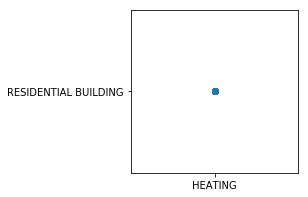

In [44]:
#Plot Major complaint type Heating against location type to check for any pattern
plt.figure(figsize=(3,3))
plt.scatter(grp_data['Complaint Type'],grp_data['Location Type'])
plt.title='Plot complaint type Heating against location type'
plt.xlabel='Complaint Type'
plt.ylabel='Location Type'
plt.show()
#Plot below gives us a clear picture of the fact that all the complaints rasied of type "HEATING" in 2009 
#occured only in Residential Building! This shows that majority of complaints recorded was from Residential Building!